In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, GridSearchCV

In [2]:
rand_state = 19

Load train and test data

In [3]:
hold_out = pd.read_csv('/Users/coleromanyk/Documents/GitHub/Capstone-2/Data/hold_out_data.csv')
train_data = pd.read_csv('/Users/coleromanyk/Documents/GitHub/Capstone-2/Data/adasyn_data.csv')

In [4]:
print(train_data.info())
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 300 non-null    int64  
 1   nitrogen             300 non-null    float64
 2   phosphate            300 non-null    float64
 3   potash               300 non-null    float64
 4   precipitation        300 non-null    float64
 5   average_temperature  300 non-null    float64
 6   accumulated_gdd      300 non-null    float64
 7   full_till_ratio      300 non-null    float64
 8   cover_crop_ratio     300 non-null    float64
 9   efficiency           300 non-null    float64
 10  total_acres          300 non-null    float64
 11  emissions            300 non-null    float64
 12  yield                300 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 30.6 KB
None


,year,nitrogen,phosphate,potash,precipitation,average_temperature,accumulated_gdd,full_till_ratio,cover_crop_ratio,efficiency,total_acres,emissions,yield
0,2006,148.0,69.0,122.0,51.06,54.5,3132.0,0.383153,0.000000,56.919946,5380.0,2.758260,157
1,1996,138.0,64.0,110.0,56.85,51.3,2996.0,0.540806,0.000000,39.833918,5450.0,3.087821,123
2,1993,134.0,68.0,114.0,50.78,52.0,3079.0,0.491073,0.000000,46.144325,5400.0,2.860590,132
3,2011,157.0,74.0,126.0,49.65,55.1,3282.0,0.373826,0.016730,44.701618,5750.0,3.266101,146
4,2016,163.0,74.0,109.0,45.97,55.7,3428.0,0.352908,0.093405,60.241253,5470.0,2.871786,173


In [5]:
print(hold_out.info())
hold_out.head(6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 6 non-null      int64  
 1   nitrogen             6 non-null      float64
 2   phosphate            6 non-null      float64
 3   potash               6 non-null      float64
 4   precipitation        6 non-null      float64
 5   average_temperature  6 non-null      float64
 6   accumulated_gdd      6 non-null      float64
 7   full_till_ratio      6 non-null      float64
 8   cover_crop_ratio     6 non-null      float64
 9   efficiency           6 non-null      float64
 10  total_acres          6 non-null      float64
 11  emissions            6 non-null      float64
 12  yield                6 non-null      int64  
dtypes: float64(11), int64(2)
memory usage: 752.0 bytes
None


,year,nitrogen,phosphate,potash,precipitation,average_temperature,accumulated_gdd,full_till_ratio,cover_crop_ratio,efficiency,total_acres,emissions,yield
0,1991,135.0,78.0,112.0,37.56,54.8,3610.0,0.678371,0.0,26.224166,5550.0,3.508214,92
1,1990,139.0,75.0,111.0,50.44,54.4,3031.0,0.760834,0.0,39.011486,5450.0,3.306718,129
2,2004,146.0,68.0,119.0,48.88,53.5,3261.0,0.553835,0.0,58.430428,5530.0,2.875214,168
3,1999,154.0,56.0,116.0,32.40,54.5,3352.0,0.542710,0.0,39.506327,5670.0,3.341237,132
4,2009,148.0,73.0,127.0,48.68,53.1,2909.0,0.407985,0.0,62.054280,5460.0,2.755652,171
5,2007,149.0,69.0,124.0,36.75,55.0,3534.0,0.412197,0.0,45.733543,6370.0,3.367331,154


Drop components features of efficiency

In [6]:
X_train = train_data.drop(['emissions', 'efficiency', 'yield'], axis=1)
y_train = train_data['efficiency']

In [7]:
X_test = hold_out.drop(['emissions', 'efficiency', 'yield'], axis=1)
y_test = hold_out['efficiency']

Define XGBoost parameters

In [8]:
xgb_params = {"objective":"reg:squarederror"}

Define models for comparison

In [9]:
ridge = Ridge()
lasso = Lasso()
net = ElasticNet()
rf = RandomForestRegressor()
xg = xgb.XGBRegressor(objective='reg:squarederror')

Define scaler varible and scaler parameter for pipelines

In [10]:
scaler = StandardScaler()
scaler_param = ('Scale', scaler)

Create and run model pipelines, printing the score to compare RMSE and R^2 returned by each model on the training data.

In [11]:
ridge_pipe = Pipeline([scaler_param, ('Ridge', ridge)])
lasso_pipe = Pipeline([scaler_param, ('Lasso', lasso)])
net_pipe = Pipeline([scaler_param, ('Elastic Net', net)])
rf_pipe = Pipeline([scaler_param, ('Random Forrest', rf)])
xgb_pipe = Pipeline([scaler_param, ('XGB Regressor', xg)])

In [12]:
pipes = [ridge_pipe, lasso_pipe, net_pipe, rf_pipe, xgb_pipe]
for pipe in pipes:
    cv_score = cross_val_score(pipe, X_train, y_train,\
                               scoring='neg_root_mean_squared_error', cv=5)
    name = str(pipe[1])
    score = (str(name.split('(')[0])+' RMSE: '+ str(np.mean(np.abs(cv_score))))
    print(score)

Ridge RMSE: 5.613022552707321
Lasso RMSE: 6.125839911848674
ElasticNet RMSE: 6.263827333660816
RandomForestRegressor RMSE: 0.08151340572821283
XGBRegressor RMSE: 0.09639407472494446


In [13]:
base_scores = []
for pipe in pipes:
    cv_score = cross_val_score(pipe, X_train, y_train, scoring='r2', cv=5)
    name = str(pipe[1])
    score = (str(name.split('(')[0])+' R2: '+ str(np.mean(cv_score)))
    base_scores.append([str(name.split('(')[0]), np.mean(cv_score)])
    print(score)

Ridge R2: 0.5814075700418349
Lasso R2: 0.5083873982662285
ElasticNet R2: 0.4855437113675719
RandomForestRegressor R2: 0.9994796183981425
XGBRegressor R2: 0.9993067488287771


Ridge Prediction R2: 0.756900227232325
RMSE: 6.005601724971391


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


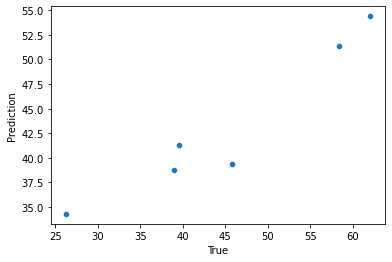

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Lasso Prediction R2: 0.4761688920864533
RMSE: 8.815762750603822


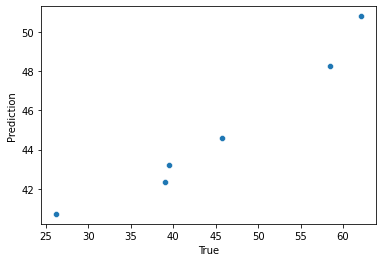

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ElasticNet Prediction R2: 0.4478266415954584
RMSE: 9.051112761574128


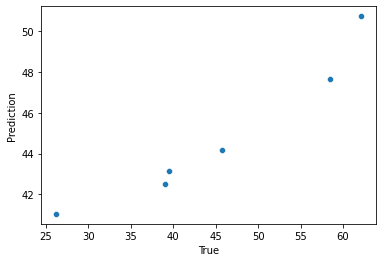

RandomForestRegressor Prediction R2: 0.3926454777698044
RMSE: 9.492604480361925


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


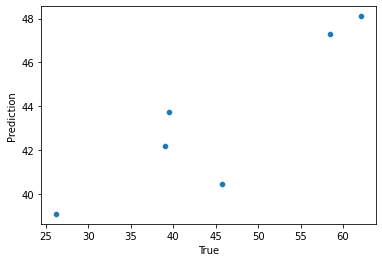

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


XGBRegressor Prediction R2: 0.5452972683126371
RMSE: 8.213495675174318


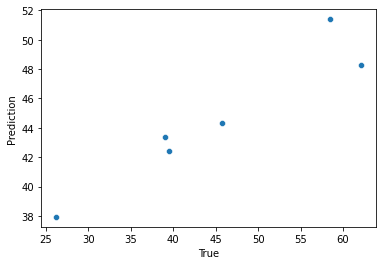

In [14]:
for pipe in pipes:
    model = pipe.fit(X_train, y_train)
    pipe_preds = model.predict(X_test)
    name = str(pipe[1])
    sns.scatterplot(y_test, pipe_preds)
    plt.xlabel('True')
    plt.ylabel('Prediction')
    print(str(name.split('(')[0])+' Prediction R2: '+\
          str(sklearn.metrics.r2_score(y_test, pipe_preds))+\
          '\nRMSE: '+ str(sklearn.metrics.mean_squared_error\
                          (y_test, pipe_preds, squared=False)))
    plt.show()

XGBoost appears to yield the highest explainatory power on the training data, and baseline on the test data it returns the closest R2 to 0.

Perform Grid and Randomized Search Params for XG Boost

In [15]:
X_scaled = scaler.fit_transform(X_train)
y_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))

In [16]:
cv_score = cross_val_score(xgb.XGBRegressor(objective="reg:squarederror"),\
                           X_scaled, y_scaled, scoring='neg_mean_squared_error', cv=5)
print('RMSE: ' + str(np.mean(np.sqrt(np.abs(cv_score)))))

RMSE: 0.013371044643390418


In [17]:
cv_score = cross_val_score(xgb.XGBRegressor(objective="reg:squarederror"),\
                           X_scaled, y_train, scoring='r2', cv=5)
print('R2: ' + str(np.mean(cv_score)))

R2: 0.9993067488287771


Random Search

In [18]:
#params subsample removed 
params = params = {'n_estimators':range(15,51,2), 'max_depth':range(3,8),\
                   'learning_rate':[ .1, .3, .5, .7], 'colsample_bytree':[.7, .8, .9],\
                   'reg_lambda':[.001, .01, 1]}

In [19]:
randomized = RandomizedSearchCV(estimator=xgb.XGBRegressor(objective="reg:squarederror"),\
                                param_distributions=params, scoring='r2', n_iter=400,\
                                cv=5, verbose=1)

In [20]:
randomized.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          reg_l

In [21]:
print("Best Random parameters found: ", randomized.best_params_)
print("Lowest Random RMSE found: ", randomized.best_score_)

Best Random parameters found:  {'reg_lambda': 0.001, 'n_estimators': 21, 'max_depth': 7, 'learning_rate': 0.5, 'colsample_bytree': 0.8}
Lowest Random RMSE found:  0.9999995805940198


In [22]:
rand_predictions = randomized.predict(X_test)

In [23]:
sklearn.metrics.explained_variance_score(y_test, rand_predictions)

0.3630376967171993

In [24]:
train_rand = randomized.predict(X_train)
sklearn.metrics.mean_squared_error(y_train, train_rand, squared=False)

0.00011722123038270968

In [25]:
sklearn.metrics.r2_score(y_test, rand_predictions)

0.362865116885174

XGBRegressor Prediction R2: 0.362865116885174


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


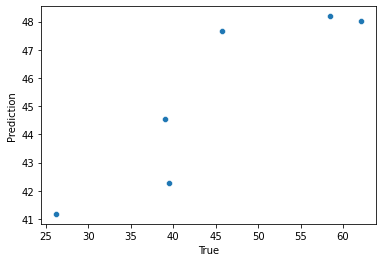

In [26]:
sns.scatterplot(y_test, rand_predictions)
plt.xlabel('True')
plt.ylabel('Prediction')
print(str(name.split('(')[0])+' Prediction R2: '+ \
      str(sklearn.metrics.r2_score(y_test, rand_predictions)))
plt.show()

In [27]:
for i,j in zip(rand_predictions, y_test):
    print('Test value: ' + str(j), 'Predicted value: ' + str(i))

Test value: 26.22416646672165 Predicted value: 41.175236
Test value: 39.01148643319613 Predicted value: 44.558533
Test value: 58.43042847478384 Predicted value: 48.192226
Test value: 39.50632737678978 Predicted value: 42.289143
Test value: 62.05427971311327 Predicted value: 48.034767
Test value: 45.73354328632951 Predicted value: 47.670414


Use RandomSearch.best_params_ to establish narrower ranges for GridSearch

In [28]:
randomized.best_params_

{'reg_lambda': 0.001,
 'n_estimators': 21,
 'max_depth': 7,
 'learning_rate': 0.5,
 'colsample_bytree': 0.8}

In [29]:
grid_params = {'n_estimators':range(15,41,2), 'max_depth':range(2,6),\
                   'learning_rate':[.5, .7, .8], 'colsample_bytree':[.9],\
                   'reg_lambda':[.01, 1]}

In [30]:
grid = GridSearchCV(estimator=xgb.XGBRegressor(objective="reg:squarederror"),\
                        param_grid=grid_params, scoring='r2', cv=5, verbose=1)

In [31]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 312 candidates, totalling 1560 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [32]:
print("Best Grid parameters found: ", grid.best_params_)
print("Lowest Grid R2 found: ", grid.best_score_)

Best Grid parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.7, 'max_depth': 2, 'n_estimators': 39, 'reg_lambda': 0.01}
Lowest Grid R2 found:  0.9999506672773197


In [33]:
predictions = grid.predict(X_test)

In [34]:
sklearn.metrics.mean_squared_error(y_test, predictions, squared=False)

8.297510510942312

In [35]:
train_preds = grid.predict(X_train)
sklearn.metrics.mean_squared_error(y_train, train_preds, squared=False)

0.007419624946434525

In [36]:
sklearn.metrics.explained_variance_score(y_test, predictions)

0.5583763152679819

In [37]:
sklearn.metrics.r2_score(y_test, predictions)

0.5359474963100399

In [38]:
for i,j in zip(predictions, y_test):
    print('Test value: ' + str(j), 'Predicted value: ' + str(i))

Test value: 26.22416646672165 Predicted value: 31.412066
Test value: 39.01148643319613 Predicted value: 47.524715
Test value: 58.43042847478384 Predicted value: 48.646866
Test value: 39.50632737678978 Predicted value: 41.204037
Test value: 62.05427971311327 Predicted value: 47.529915
Test value: 45.73354328632951 Predicted value: 43.69756


XGBRegressor Prediction R2: 0.5359474963100399


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


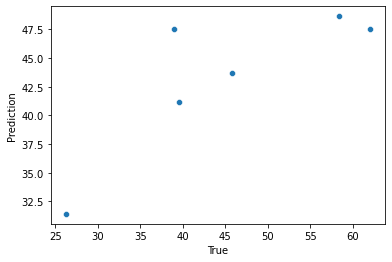

In [39]:
sns.scatterplot(y_test, predictions)
plt.xlabel('True')
plt.ylabel('Prediction')
print(str(name.split('(')[0])+' Prediction R2: '+ str(sklearn.metrics.r2_score(y_test, predictions)))
plt.show()

Outlier data

In [40]:
outlier_ratio = pd.read_csv('/Users/coleromanyk/Documents/GitHub/Capstone-2/Data/outlier_data.csv')
outlier_ho = pd.read_csv('/Users/coleromanyk/Documents/GitHub/Capstone-2/Data/outlier_ho.csv')

In [41]:
outlier_X = outlier_ratio.drop(['efficiency', 'cover_crop_dummy', 'emissions', 'yield'], axis=1)
outlier_y = outlier_ratio['efficiency']
ho_X = outlier_ho.drop(['efficiency', 'emissions', 'yield'], axis=1)
ho_y = outlier_ho['efficiency']

In [43]:
outlier_scores = []
for pipe in pipes:
    cv_score_r2 = cross_val_score(pipe, outlier_X, outlier_y, scoring='r2', cv=5)
    cv_score_rmse = cross_val_score(pipe, outlier_X, outlier_y,\
                                    scoring='neg_root_mean_squared_error', cv=5)
    name = str(pipe[1])
    score = (str(name.split('(')[0])+' R2: '+ str(np.mean(cv_score_r2))+\
             '\nRMSE: '+str(np.mean(abs(cv_score_rmse))))
    outlier_scores.append([str(name.split('(')[0]), np.mean(cv_score_r2)])
    print(score)

Ridge R2: 0.6585582954013218
RMSE: 4.286072595151014
Lasso R2: 0.5530231682759545
RMSE: 4.906565668327849
ElasticNet R2: 0.5081916336905217
RMSE: 5.14015099523066
RandomForestRegressor R2: 0.9967181006206101
RMSE: 0.27465003863792076
XGBRegressor R2: 0.9998298637513171
RMSE: 0.044025931993099274


Comparison of base model predictions vs outlierless model predictions, tree based learners do not perform as well in the absence of the outlier data.

In [44]:
for base, outlier in zip(base_scores, outlier_scores):
    print(base[0], '\nBase score: ', str(base[1]), '\nOutlierless score: ', str(outlier[1]), '\nBase > outlierless: ', base[1]>=outlier[1], '\n')

Ridge 
Base score:  0.5814075700418349 
Outlierless score:  0.6585582954013218 
Base > outlierless:  False 

Lasso 
Base score:  0.5083873982662285 
Outlierless score:  0.5530231682759545 
Base > outlierless:  False 

ElasticNet 
Base score:  0.4855437113675719 
Outlierless score:  0.5081916336905217 
Base > outlierless:  False 

RandomForestRegressor 
Base score:  0.9994796183981425 
Outlierless score:  0.9967181006206101 
Base > outlierless:  True 

XGBRegressor 
Base score:  0.9993067488287771 
Outlierless score:  0.9998298637513171 
Base > outlierless:  False 



Ridge regression outperforms most other models in prediction R2, when using outlierless training data. This suggests that it may be a potential alternative to the XGBoost regressor

Ridge Prediction R2: 0.7831924936438026
RMSE: 4.465657231313245


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


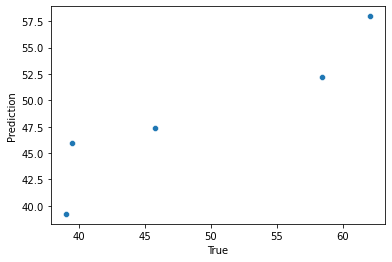

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Lasso Prediction R2: 0.5163599412017814
RMSE: 6.669747002236436


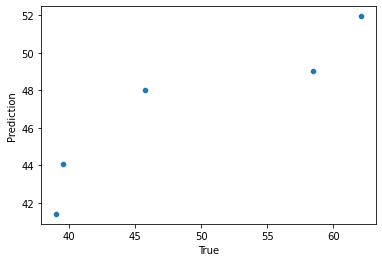

ElasticNet Prediction R2: 0.3765272914011991
RMSE: 7.572808101639149


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


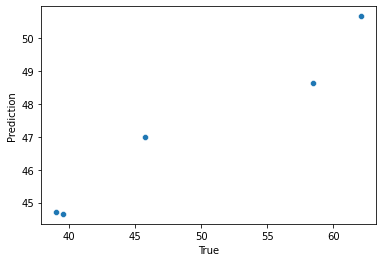

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


RandomForestRegressor Prediction R2: 0.6877311120096314
RMSE: 5.359355750934559


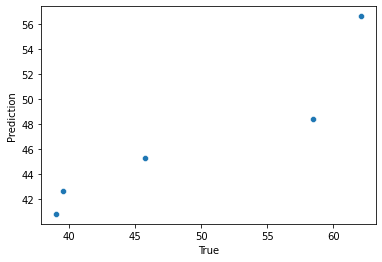

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


XGBRegressor Prediction R2: 0.6858582486858904
RMSE: 5.3754033563626455


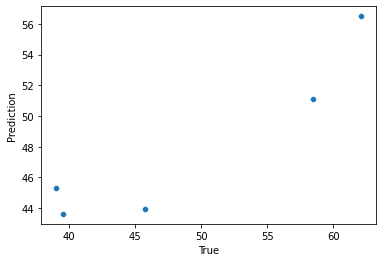

In [45]:
for pipe in pipes:
    pipe_model = pipe.fit(outlier_X, outlier_y)
    pipe_preds = pipe_model.predict(ho_X)
    name = str(pipe[1])
    sklearn.metrics.mean_squared_error(ho_y, pipe_preds, squared=False)
    sns.scatterplot(ho_y, pipe_preds)
    plt.xlabel('True')
    plt.ylabel('Prediction')
    print(str(name.split('(')[0])+' Prediction R2: '+\
          str(sklearn.metrics.r2_score(ho_y, pipe_preds))+\
          '\nRMSE: '+ str(sklearn.metrics.mean_squared_error\
                          (ho_y, pipe_preds, squared=False)))
    plt.show()

Parameter tune XGboost regressor to see the predictive power on outlierless data.

In [46]:
randomized_out = RandomizedSearchCV(estimator=xgb.XGBRegressor(objective="reg:squarederror")\
                                    , param_distributions=params, scoring='r2', n_iter=240,\
                                    cv=5,verbose=1)

In [47]:
randomized_out.fit(outlier_X, outlier_y)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          reg_l

In [48]:
print("Best Random parameters found: ", randomized_out.best_params_)
print("Best Random R2 found: ", randomized_out.best_score_)

Best Random parameters found:  {'reg_lambda': 1, 'n_estimators': 47, 'max_depth': 4, 'learning_rate': 0.3, 'colsample_bytree': 0.7}
Best Random R2 found:  0.9999967044943755


In [49]:
grid_params = {'n_estimators':range(15,51,2), 'max_depth':range(3,5),\
                   'learning_rate':[.6, .7, .8], 'colsample_bytree':[.8, .9, 1],\
                   'reg_lambda':[.1, 1, 2, 3]}

In [50]:
grid_out = GridSearchCV(estimator=xgb.XGBRegressor(objective="reg:squarederror"),\
                        param_grid=grid_params, scoring='r2', cv=5, verbose=1)

In [51]:
grid_out.fit(outlier_X, outlier_y)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [52]:
print("Best Grid parameters found: ", grid_out.best_params_)
print("Best Grid R2 found: ", grid_out.best_score_)

Best Grid parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.8, 'max_depth': 3, 'n_estimators': 33, 'reg_lambda': 2}
Best Grid R2 found:  0.9999999826596037


The tuned XGBoost Regressor performs significantly better in the absence of the outlier points.

In [53]:
out_predictions = grid_out.predict(ho_X)

In [54]:
sklearn.metrics.r2_score(ho_y, out_predictions)

0.7632076787863906

In [55]:
sklearn.metrics.mean_squared_error(ho_y, out_predictions, squared=False)

4.6669380422033315

In [56]:
for i,j in zip(out_predictions, ho_y):
    print('Test value: ' + str(j), 'Predicted value: ' + str(i))

Test value: 39.01148643319613 Predicted value: 42.283558
Test value: 58.43042847478384 Predicted value: 55.272263
Test value: 39.50632737678978 Predicted value: 35.97893
Test value: 62.05427971311327 Predicted value: 54.28591
Test value: 45.73354328632951 Predicted value: 49.661777


Tuned Ridge Model

In [57]:
scaled_training = scaler.fit_transform(outlier_X)
scaled_test = scaler.fit_transform(ho_X)

Training eval

In [74]:
model = Ridge(alpha=1)
rm = model.fit(scaled_training, outlier_y)
rm_preds = rm.predict(scaled_training)

In [75]:
sklearn.metrics.r2_score(outlier_y, rm_preds)

0.6941755683400836

In [76]:
sklearn.metrics.mean_squared_error(outlier_y, rm_preds, squared=False)

4.121423477784324

Test eval

In [85]:
model = Ridge()
rm = model.fit(scaled_training, outlier_y)
rm_preds = rm.predict(scaled_test)

In [87]:
sklearn.metrics.r2_score(ho_y, rm_preds)

0.8008080938492251

In [88]:
sklearn.metrics.mean_squared_error(ho_y, rm_preds, squared=False)

4.280397203504089

The model significantly outperforms on the test set. This is most likely and issue cuased by the very small sample size of the test data. It also suggested that the model should be regularized in order to generalize better to knew information

In [77]:
train_score = sklearn.metrics.r2_score(outlier_y, rm_preds)
ideal_lambdas = []
lambdas = []
scores = []
for i in range(1,100):
    model = Ridge(alpha=i)
    rm = model.fit(scaled_training, outlier_y)
    rm_preds = rm.predict(scaled_test)
    if sklearn.metrics.r2_score(ho_y, rm_preds) <= train_score:
         ideal_lambdas.append(i)   
    lambdas.append(i)
    scores.append(sklearn.metrics.r2_score(ho_y, rm_preds))

In [78]:
target = min(ideal_lambdas)+10

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


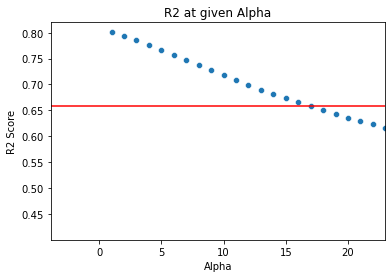

In [79]:
sns.scatterplot(lambdas, scores)
plt.title('R2 at given Alpha')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.xlim(xmax=target)
plt.axhline(y=0.6585, color='r')

In [80]:
model = Ridge(alpha=min(ideal_lambdas))
rm = model.fit(scaled_training, outlier_y)
rm_preds = rm.predict(scaled_test)

In [81]:
sklearn.metrics.r2_score(ho_y, rm_preds)

0.6901767954278347

In [82]:
sklearn.metrics.mean_squared_error(ho_y, rm_preds, squared=False)

5.338327315197621

In [67]:
for i,j in zip(rm_preds, ho_y):
    print('Test value: ' + str(j), 'Predicted value: ' + str(i))

Test value: 39.01148643319613 Predicted value: 44.748645332961765
Test value: 58.43042847478384 Predicted value: 53.29199102700649
Test value: 39.50632737678978 Predicted value: 46.199218083936046
Test value: 62.05427971311327 Predicted value: 58.08118331933863
Test value: 45.73354328632951 Predicted value: 51.865191093297035


Which metric should be used to determine the best model?

In [70]:
if np.std(ho_y) > np.std(outlier_y):
    print('R2 score should be used to evaluate an individual model\'s performance.')
else:
    print('RMSE may be used to evaluate an individual model\'s performance.')

R2 score should be used to evaluate an individual model's performance.


The tuned XGBRegressor performs well, on the outlierless test data it yields an RMSE of 4.667 and is able to account for 76% of the variation in the test data. This is a vast improvement over the XGBoost model trained on the data including the outliers (RMSE of 8.297 and R2 of 0.53).

However, it is likely that the XGBoost model overfits too much to the training data as there is a significant jump between the training RMSE of 0.044 and the test RMSE of 4.955. 

Therefore I would recommend using the tuned Ridge regression model. As it yields a similar RMSE of 5.612 and at the cost of slightly R2 of .65, without overfitting to the training data (1.326 increase in RMSE from the training set to the test set).